In [3]:
%matplotlib inline

import nbimporter
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [4]:
train = pd.read_csv("data/TrainData1.txt", sep='\t')
labels = pd.read_csv("data/TrainLabel1.txt", sep='\t')

In [5]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,13422818791946309457778495933816971564560215186...,67114093959731547288892479669084857822801075932...,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,20134228187919464186667743900725457346840322779...,13422818791946309457778495933816971564560215186...,3.504,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,26845637583892618915556991867633943129120430373...,...,26845637583892618915556991867633943129120430373...,67114093959731547288892479669084857822801075932...,1.250,40268456375838928373335487801450914693680645559...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,26845637583892618915556991867633943129120430373...,33557046979865773644446239834542428911400537966...,13422818791946309457778495933816971564560215186...
std,11546481745700334532041446684281935174181082516...,81923192051904040180026773983385323642459353772...,11546481745700336049751518735632771830010697222...,11546481745700337567461590786983608485840311928...,14093311897214878950381315815876273286336264059...,11546481745700337567461590786983608485840311928...,0.129,11546481745700337567461590786983608485840311928...,11546481745700337567461590786983608485840311928...,16217727724465412374902982829292987442685014929...,...,16217727724465409339482838726591314131025785517...,81923192051904040180026773983385323642459353772...,0.341,19725119911506460485109985481592386033114246749...,81923192051904040180026773983385323642459353772...,81923192051904055357127494496893690200755500830...,81923192051904040180026773983385323642459353772...,16217727724465412374902982829292987442685014929...,18069338605547722241511982604358942422451091585...,11546481745700336049751518735632771830010697222...
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.430,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.855,1.966,1.895,2.447,3.369,3.378,3.528,3.500,3.617,3.640,...,1.803,1.723,1.000,2.153,3.081,1.882,2.586,1.723,2.545,2.094
75%,3.894,2.177,2.097,2.619,3.466,3.478,3.579,3.564,3.661,3.679,...,2.042,1.865,1.457,2.243,3.215,2.024,2.636,2.063,2.690,2.225
max,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,3.736,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.652,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [6]:
labels.describe()

,1
count,149.000
mean,1.604
std,1.096
min,1.000
25%,1.000
50%,1.000
75%,2.000
max,5.000


# Data Cleaning

#### Todos:
+ figure out how many and which rows for each column have these huge numbers
+ figure out a way to map the values to ones that fit more with the data 
    * make them "average joes"

In [7]:
fr = train.iloc[0,:] # first row
poten_errors = fr[fr > fr.mean()]
poten_errors.describe()

count                                               69.000
mean    10000000000000002101697803323328251387822715387...
std     12230631806435245486489244355180364340614809249...
min     10000000000000000887529745682247582063159023622...
25%     10000000000000000887529745682247582063159023622...
50%     10000000000000000887529745682247582063159023622...
75%     10000000000000000887529745682247582063159023622...
max     10000000000000000887529745682247582063159023622...
Name: 0, dtype: float64

In [8]:
fr[~(fr > fr.mean())].describe()

count   3243.000
mean       2.167
std        0.553
min        1.000
25%        1.884
50%        2.194
75%        2.482
max        3.904
Name: 0, dtype: float64

We have 69 rows with vastly diffrent values. We can't just drop the rows or columns because the signal to noise ratio for both axis is really low. Lets find out more about these errors.

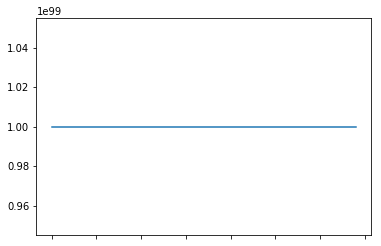

In [9]:
poten_errors.plot.line()

It seems like all the error numbers are the same even though the standard deviation, mean, and max are different numbers. Let's verify that the numbers are actually the same.

In [10]:
mMax = poten_errors.max()
all_diffs = [mMax - i for i in poten_errors]
extreme_diffs = poten_errors.max() - poten_errors.min()

print("Max - Min\n", extreme_diffs, "\nMax - All\n", all_diffs)

Max - Min
 0.0 
Max - All
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Since all the errors are indeed the same number, lets replace all of them with the mean of the particular column that they're in for now. We can think of a better way to replace those values later.

In [11]:
for col in train.columns:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train[col][gt_mean] = new_col_mean

In [12]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,3.854,1.889,1.878,2.449,3.348,3.356,3.386,3.480,3.593,3.633,...,1.683,1.729,1.031,2.161,3.083,1.889,2.574,1.620,2.483,2.060
std,0.048,0.392,0.304,0.227,0.178,0.175,0.063,0.120,0.092,0.061,...,0.418,0.265,0.058,0.111,0.197,0.231,0.107,0.524,0.284,0.231
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.386,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.854,1.949,1.887,2.447,3.363,3.372,3.386,3.498,3.608,3.638,...,1.763,1.723,1.000,2.153,3.081,1.882,2.585,1.673,2.539,2.093
75%,3.887,2.172,2.092,2.599,3.457,3.466,3.395,3.559,3.658,3.677,...,2.027,1.862,1.031,2.218,3.212,2.021,2.636,2.053,2.669,2.217
max,3.973,2.695,2.619,2.966,3.720,3.722,3.502,3.689,3.742,3.743,...,2.321,2.625,1.246,2.512,3.527,2.724,2.800,2.903,3.084,2.576


Lets find out how correlated each of these variabels are with the label.

In [13]:
def corr(labels, train):
    n = len(labels)
    v1, v2 = labels.values, train.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n, train.columns, labels.columns)

In [14]:
train_label_corr = corr(labels, train)

In [15]:
def count_corrs(correlation_result, with_labels=True):
    if with_labels:
        return [(i, correlation_result[correlation_result > i].dropna().size) for i in np.arange(0,1.1,.1)]
    else:
        return [correlation_result[correlation_result > i].dropna().size for i in np.arange(0,1.1,.1)]

In [16]:
count_corrs(train_label_corr)

[(0.0, 1907),
 (0.1, 1459),
 (0.2, 1090),
 (0.30000000000000004, 687),
 (0.4, 369),
 (0.5, 161),
 (0.6000000000000001, 37),
 (0.7000000000000001, 4),
 (0.8, 0),
 (0.9, 0),
 (1.0, 0)]

Looks like there are lots of columns that aren't at all correlated with the labels. Let's drop all the ones who have a 20% or lower correlation. 

*idea: to improve the model, we could look into using the 20% category and play with corrlated columns in that category.*

In [17]:
train = train[train_label_corr[train_label_corr >= .3].dropna().index]

In [18]:
train.describe()

,1.75204844781944,2.33609934008509.1,2.40716987648371,2.31954325807731,1.88530466758897,1.72794770954480,3.44173440099782,1.27760921430409,1.4,2.68337128648794,...,2.87842412570733,1.90768002424242.12,2.76071643747420.4,1.53364497879876.10,1.75204844781944.13,2.21232080314198.9,2.32163984904169.9,2.16070857229243.10,2.76071643747420.5,2.05434488876763.5
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.697,2.388,2.488,1.926,1.941,1.934,3.310,1.513,1.601,2.508,...,3.079,1.920,2.615,1.454,1.587,2.242,2.393,2.174,2.801,2.161
std,0.278,0.125,0.179,0.436,0.329,0.405,0.104,0.410,0.429,0.272,...,0.103,0.294,0.182,0.448,0.346,0.153,0.204,0.148,0.134,0.111
min,1.000,2.054,2.087,1.000,1.000,1.000,2.933,1.000,1.000,1.366,...,2.722,1.483,2.148,1.000,1.000,1.946,1.919,1.792,2.493,1.859
25%,1.549,2.315,2.369,1.755,1.791,1.826,3.256,1.231,1.229,2.395,...,3.027,1.758,2.496,1.000,1.380,2.138,2.273,2.088,2.727,2.103
50%,1.689,2.370,2.476,2.016,1.958,2.008,3.310,1.475,1.676,2.511,...,3.083,1.863,2.613,1.387,1.587,2.225,2.368,2.182,2.780,2.153
75%,1.848,2.464,2.583,2.234,2.137,2.140,3.368,1.659,1.965,2.684,...,3.137,1.955,2.721,1.676,1.717,2.324,2.502,2.265,2.847,2.218
max,2.579,2.789,3.020,2.602,2.696,3.539,3.581,3.027,2.434,3.155,...,3.357,3.050,3.210,3.178,2.558,2.704,3.001,2.500,3.263,2.512


We still have so many columns. For now, it's fine but we could use PCA to reduce the columns.

In [19]:
# http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
# https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
# https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
train_corrs = train.corr()
correlation_threshold = .85
# threshold for dropping correlated columns
high_corrs = {}
for col in train_corrs:
    df = train_corrs[col]
    corrs = df[df >= correlation_threshold].dropna().keys().drop(col)
    if corrs.size > 0:
        high_corrs[col] = corrs

In [20]:
new_label_map = {}
for i, col in enumerate(train.columns):
    new_label_map[col] = "f{}".format(i)

train = train.rename(columns=new_label_map)

labels = labels.rename(columns={"1": "label"})
merged = labels.merge(train, left_index=True,right_index=True)

train.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685',
       'f686'],
      dtype='object', length=687)

# Data Analysis
- Are there a lot of outliers? If so, how many?
- What is the relationship between each of the variables and the label? Linear? Parabolic?

In [21]:
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.697,2.388,2.488,1.926,1.941,1.934,3.310,1.513,1.601,2.508,...,3.079,1.920,2.615,1.454,1.587,2.242,2.393,2.174,2.801,2.161
std,0.278,0.125,0.179,0.436,0.329,0.405,0.104,0.410,0.429,0.272,...,0.103,0.294,0.182,0.448,0.346,0.153,0.204,0.148,0.134,0.111
min,1.000,2.054,2.087,1.000,1.000,1.000,2.933,1.000,1.000,1.366,...,2.722,1.483,2.148,1.000,1.000,1.946,1.919,1.792,2.493,1.859
25%,1.549,2.315,2.369,1.755,1.791,1.826,3.256,1.231,1.229,2.395,...,3.027,1.758,2.496,1.000,1.380,2.138,2.273,2.088,2.727,2.103
50%,1.689,2.370,2.476,2.016,1.958,2.008,3.310,1.475,1.676,2.511,...,3.083,1.863,2.613,1.387,1.587,2.225,2.368,2.182,2.780,2.153
75%,1.848,2.464,2.583,2.234,2.137,2.140,3.368,1.659,1.965,2.684,...,3.137,1.955,2.721,1.676,1.717,2.324,2.502,2.265,2.847,2.218
max,2.579,2.789,3.020,2.602,2.696,3.539,3.581,3.027,2.434,3.155,...,3.357,3.050,3.210,3.178,2.558,2.704,3.001,2.500,3.263,2.512


Standard deviation is really good. Lets find outliers by getting the values that are `mean + std*n, n= {2 to 5}`

In [22]:
calc_low_high = lambda mean, std, i: (df.mean() + (df.std()*float(i)), df.mean() + (df.std()*float(i+1)))

v = {}
for col in train:
    df = train[col]
    f = []
    stds_from_min = np.floor((df.min() - df.mean()) / df.std())
    for i in range(int(stds_from_min), 0):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    
    stds_from_max = (df.max() - df.mean()) / df.std()
    for i in range(int(np.ceil(stds_from_max))):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    v[col] = f

In [23]:
# for col in train.columns:
#     train[col].plot.kde()
#     plt.legend()
#     plt.show()

In [24]:
std_dist = {}
for key in v:
    data = v[key]
    for item in data:
        if item[0] not in std_dist:
            std_dist[item[0]] = [item[1]]
        else:
            std_dist[item[0]].append(item[1])

The above shows, for each column in the training set, the number of values that fall into categories corresponding to the number of standard deveiations from the mean. 
The keys are the stds from mean and the values are the number of values that are that many stds from the mean found in each column.

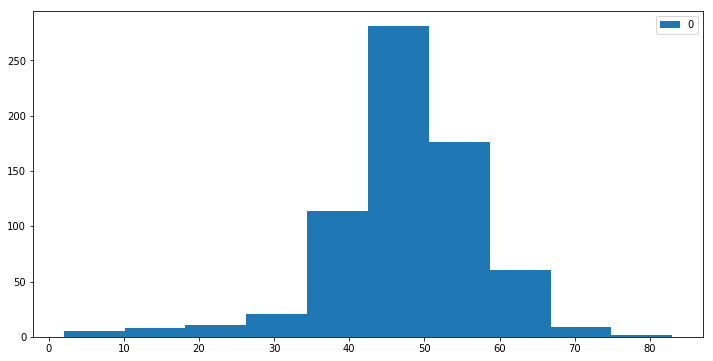

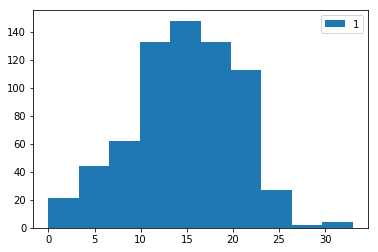

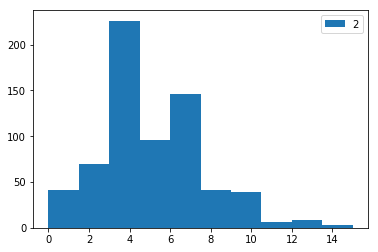

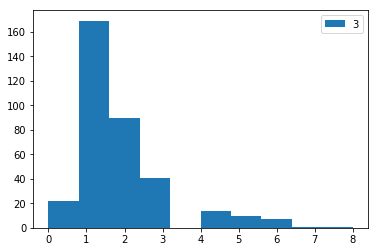

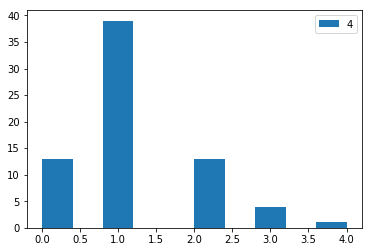

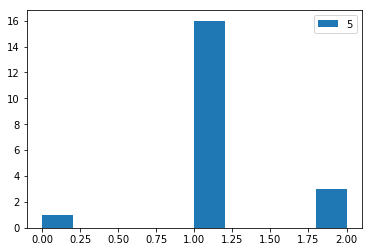

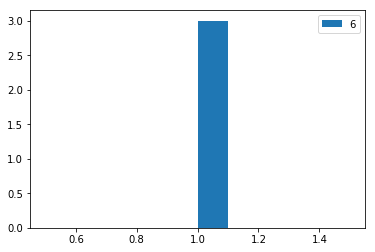

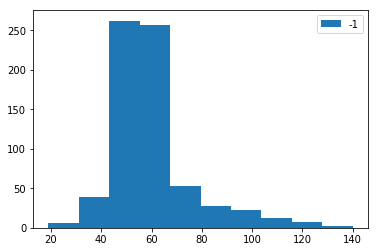

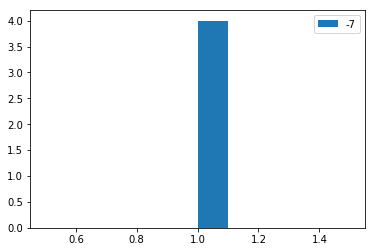

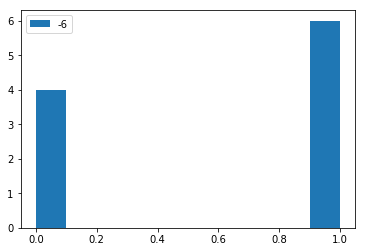

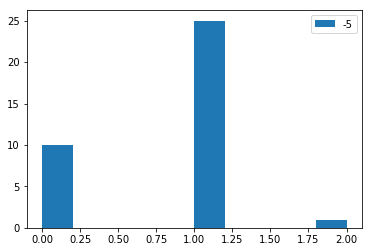

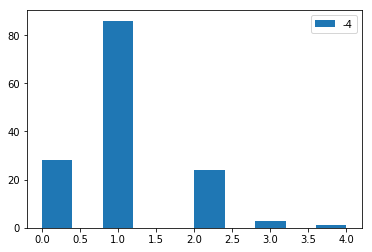

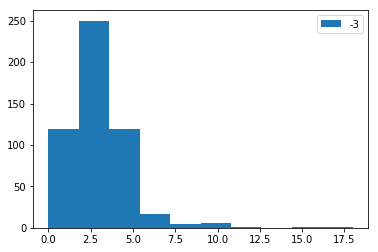

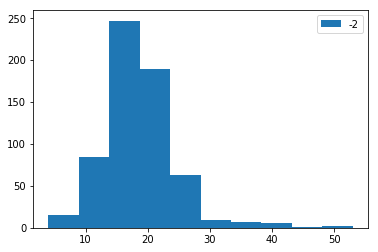

In [25]:
plt.figure(figsize=(12,6))
for category in std_dist:
    plt.hist(std_dist[category], label=str(category))
    plt.legend()
    plt.show()

It actually seems like there's not a whole lot of values that are super far away from the mean in terms of stds. If there were, we'd think about how to replace them or remove records (although removing would be a bad choice because we only have 149 records to start with)

Let's find out the relationship between the labels and each of the variables.

In [26]:
train_grouped = merged.groupby("label")

In [27]:
train_grouped.describe()

f0                                                f1        ...   \
        count  mean   std   min   25%   50%   75%   max   count  mean  ...    
label                                                                  ...    
1     107.000 1.674 0.215 1.000 1.578 1.689 1.813 2.196 107.000 2.356  ...    
2      14.000 1.510 0.186 1.211 1.380 1.478 1.604 1.893  14.000 2.386  ...    
3      11.000 1.480 0.265 1.042 1.383 1.494 1.637 1.840  11.000 2.520  ...    
4      14.000 2.180 0.246 1.745 2.014 2.128 2.375 2.579  14.000 2.534  ...    
5       3.000 1.930 0.189 1.715 1.862 2.009 2.038 2.067   3.000 2.385  ...    

        f98           f99                                            
        75%   max   count  mean   std   min   25%   50%   75%   max  
label                                                                
1     1.797 2.238 107.000 1.888 0.235 1.199 1.751 1.927 2.063 2.353  
2     1.623 1.835  14.000 2.102 0.167 1.621 2.073 2.160 2.207 2.264  
3     1.681 1.817  11.000 1.673 0.266 1.042 1.538 1.699 1.845 2.056  
4     2.347 2.444  14.000 2.297 0.200 1.749 2.254 2.381 2.421 2.475  
5     2.085 2.157   3.000 2.304 0.179 2.102 2.236 2.369 2.406 2.442  

[5 rows x 5496 columns]

# Model Building

## Which algorithm to use?
We'll use a random forest classifier (rfc) with bootstrapping and feature bagging optimizations because:
- ease of implementation
- rfcs handle multi-class predictions well without more additional effort
- works well with high dimensional data
- we'll choose use random forest as opposed to boosted trees since we have highly dimensional data
- with a reasonably high probability, can be used with the other datasets for this project since the algorithm is very robust

## The Algorithm
We'll use the CART algorithm for splitting since we have continuous data.  
  
[Full example](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)  
  
Steps:
1. Initialize Tree
2. For each column, calc best split across all rows based using gini impurity score - [exmplanation](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) | [exmaple](https://www.researchgate.net/post/How_to_compute_impurity_using_Gini_Index) | [useful blog](http://dni-institute.in/blogs/cart-algorithm-for-decision-tree/)
3. Split the dataset based on the split condition with the highest gini score and add both sets as leaves on a tree node. The node represents a decision point, that being the condition with the highest gini score.
3. Repeat 2 & 3 until an arbitrary minimum number of rows are left
4. Prune tree

idea: instead of using the raw values, categorize the numbers as # of stds away from mean
                                                                                                     

In [104]:
g = train[train["f1"] > 2.5].merge(labels, left_index=True, right_index=True).groupby("label")
print(( 1 - (g.count()/149)**2).sum(axis=0))
print(((g.count()/149) ** 2 )["f1"].sum())
# 1 - ((g.size() / 149) ** 2).sum()
# (g.count() / 149) ** 2
# (1 - np.sum((g.count() / 149) ** 2)) * 

f0     2.987
f1     2.987
f2     2.987
f3     2.987
f4     2.987
f5     2.987
f6     2.987
f7     2.987
f8     2.987
f9     2.987
f10    2.987
f11    2.987
f12    2.987
f13    2.987
f14    2.987
f15    2.987
f16    2.987
f17    2.987
f18    2.987
f19    2.987
f20    2.987
f21    2.987
f22    2.987
f23    2.987
f24    2.987
f25    2.987
f26    2.987
f27    2.987
f28    2.987
f29    2.987
        ... 
f657   2.987
f658   2.987
f659   2.987
f660   2.987
f661   2.987
f662   2.987
f663   2.987
f664   2.987
f665   2.987
f666   2.987
f667   2.987
f668   2.987
f669   2.987
f670   2.987
f671   2.987
f672   2.987
f673   2.987
f674   2.987
f675   2.987
f676   2.987
f677   2.987
f678   2.987
f679   2.987
f680   2.987
f681   2.987
f682   2.987
f683   2.987
f684   2.987
f685   2.987
f686   2.987
Length: 687, dtype: float64
0.013062474663303455


In [125]:
def calc_best_gini_split(df, labels):
    total_rows = df.shape[0]
    split_ginis = []
    splits = df.apply(lambda x: (df[x > df], df[x < df]), axis=1)
    for split1, split2 in splits:
        s1_grouped = split1.merge(labels, left_index=True, right_index=True).groupby("label")
        s2_grouped = split2.merge(labels, left_index=True, right_index=True).groupby("label")
        
        s1_cost = (1 - ((s1_grouped.count() / total_rows) ** 2).sum(axis=0)) * (split1.shape[0] / total_rows)
        s2_cost = (1 - ((s2_grouped.count() / total_rows) ** 2).sum(axis=0)) * (split2.shape[0] / total_rows)
        split_ginis.append(s1_cost + s2_cost)
    return split_ginis

t = calc_best_gini_split(train.iloc[0:10], labels)

In [128]:
len(t)

10